# Importing Libraries 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import  tensorflow.keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
np.random.seed(0)
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__
#keras.__version__

'2.5.0'

In [3]:
import pickle
import random
import pandas as pd
import cv2

# Data Preprocessing 

In [4]:
training_file = r'D:\Udacity\CarND-Traffic-Sign-Classifier-Project\train.p'
validation_file= r"D:\Udacity\CarND-Traffic-Sign-Classifier-Project\valid.p"
testing_file = r"D:\Udacity\CarND-Traffic-Sign-Classifier-Project\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [5]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39209, 32, 32, 3)
y_train shape: (39209,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "Check if the no. of images is equal to labels"
assert(X_valid.shape[0] == y_valid.shape[0]), "Check if the no. of images is equal to labels"
assert(X_test.shape[0] == y_test.shape[0]), "Check if the no. of images is equal to labels"

In [7]:
n_train = len(X_train) #Number of training examples
n_validation = len(X_valid) #Number of validation examples
n_test = len(X_test) #Number of validation examples

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [8]:
data = pd.read_csv(r"D:\Udacity\CarND-Traffic-Sign-Classifier-Project\signnames.csv")
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

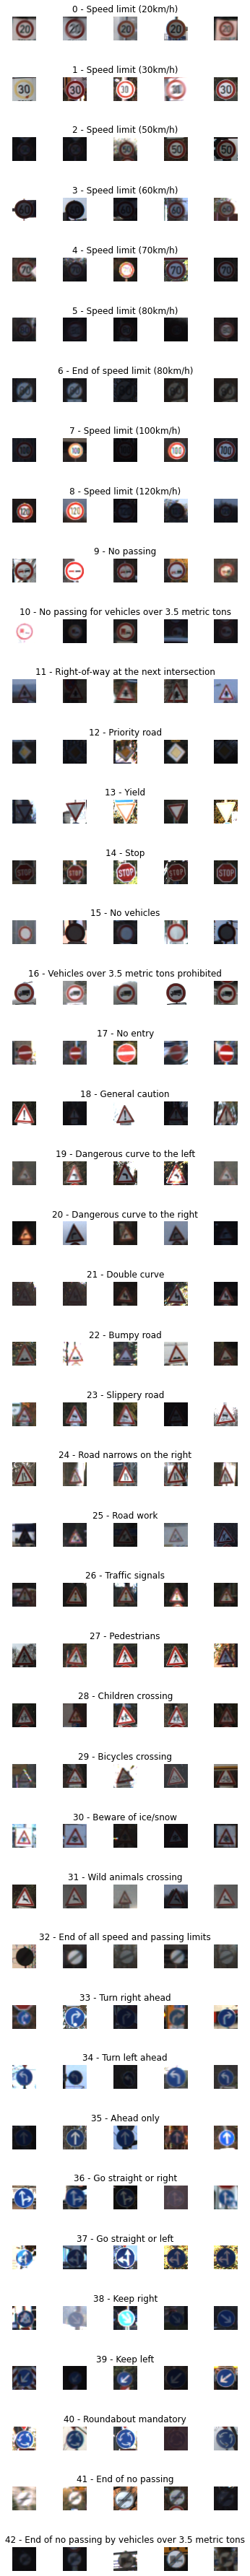

In [9]:
#data = pd.read_csv(r"D:\Udacity\CarND-Traffic-Sign-Classifier-Project\signnames.csv")
num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
43


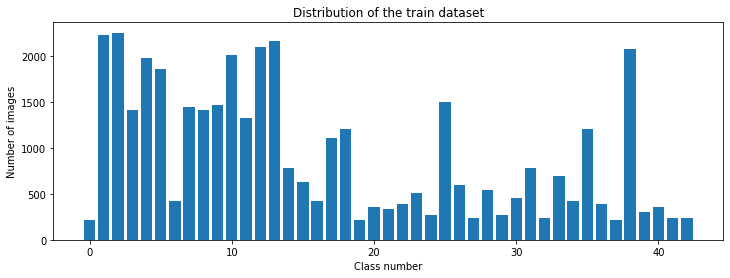

In [10]:
print(num_of_samples)
print(len(num_of_samples))
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


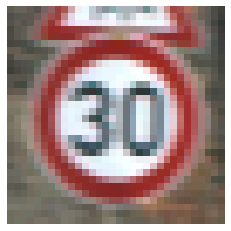

In [11]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


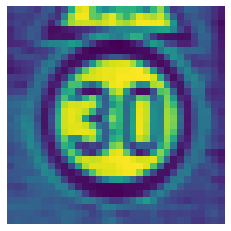

In [12]:
#Reduce dimensions from RGB to GRAY for lower computation of the network
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


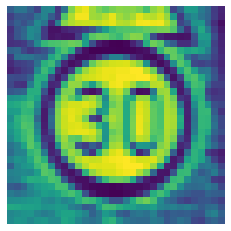

In [13]:
def equalize(img):
    img = cv2.equalizeHist(img)   #Standardize all images
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

#Apply to all images
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255     #Normalize 
    return img
  
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_valid = np.array(list(map(preprocess, X_valid)))

(39209, 32, 32)


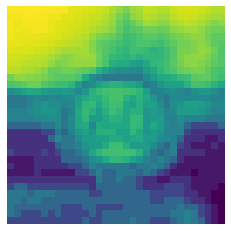

In [14]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [15]:
X_train = X_train.reshape(39209, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)

In [16]:
#Data Augmentation for tuning the Model 
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

(15, 32, 32, 1)


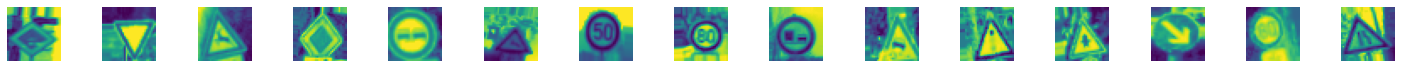

In [17]:
datagen.fit(X_train)
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(39209, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)

# CNN Model Implementation

In [20]:
def Lenet_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
  
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
  
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
#Compile model 
    model.compile(optimizer= 'adam',loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = Lenet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [26]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=len(X_train)//50,
                            epochs=10,
                            validation_data=(X_valid, y_valid), shuffle = 1)

Epoch 1/10
784/784 [==============================] - 232s 296ms/step - loss: 0.3980 - accuracy: 0.8785 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 2/10
784/784 [==============================] - 252s 321ms/step - loss: 0.2495 - accuracy: 0.9236 - val_loss: 0.0487 - val_accuracy: 0.9830
Epoch 3/10
784/784 [==============================] - 254s 324ms/step - loss: 0.1854 - accuracy: 0.9426 - val_loss: 0.0205 - val_accuracy: 0.9943
Epoch 4/10
784/784 [==============================] - 250s 319ms/step - loss: 0.1579 - accuracy: 0.9520 - val_loss: 0.0200 - val_accuracy: 0.9943
Epoch 5/10
784/784 [==============================] - 252s 322ms/step - loss: 0.1372 - accuracy: 0.9580 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 6/10
784/784 [==============================] - 256s 326ms/step - loss: 0.1177 - accuracy: 0.9627 - val_loss: 0.0178 - val_accuracy: 0.9937
Epoch 7/10
784/784 [==============================] - 235s 300ms/step - loss: 0.1153 - accuracy: 0.9659 - val_loss: 0.0133 -

Text(0.5, 0, 'epoch')

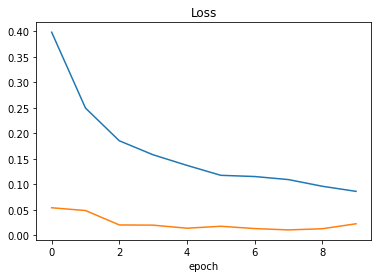

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

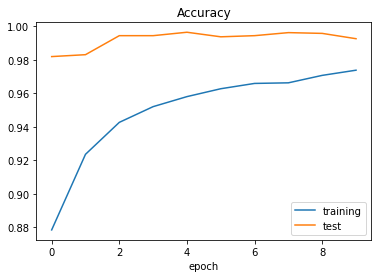

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [32]:
#Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

In [33]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.12082688510417938
Test accuracy: 0.965954065322876


# Testing with New Images

(32, 32)
predicted sign: [23]


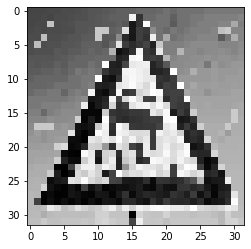

In [36]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))